# Week 9: Neural Networks

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## Exercise 48
### 4.1 The simplest psosible networks
This exercise is about getting some experience with what can be fitted with the simplest possible neural networks. For each model you should start the fitting of the network parameters a number of times and judge how good the fit can become and how robust the fitting process is.

In each exercise, you write a new model using the torch.nn.Module class.

### 4.2 Linear data: One-parameter model
Use these data points in the first exercise question:

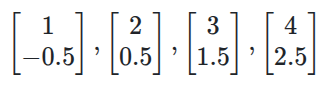

In [45]:
# data for the first few exercises
x_tensor = torch.tensor([1, 2, 3, 4])
y_tensor = torch.tensor([-0.5,0.5,1.5,2.5])

Start by defining a linear model that as its only action takes an input, multiplies with a parameter, and outputs the result.

In [ ]:
class LinModelNoBias(torch.nn.Module):

    def __init__(self,A=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))

    def forward(self, x): # We implement the forward pass
        return self.A * x
    
A = 1

model = LinModelNoBias(A=A)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
A = 1.0


In [47]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 2.25
Step 500, Loss: 0.3750005066394806
Step 1000, Loss: 0.3749999701976776
Step 1500, Loss: 0.3749999701976776
Step 2000, Loss: 0.3749999701976776
Step 2500, Loss: 0.3749999701976776
Step 3000, Loss: 0.3749999701976776
Step 3500, Loss: 0.3749999701976776
Step 4000, Loss: 0.3749999701976776
Step 4500, Loss: 0.3749999701976776
Step 5000, Loss: 0.3749999701976776
Step 5500, Loss: 0.3749999701976776
Step 6000, Loss: 0.3749999701976776
Step 6500, Loss: 0.3749999701976776
Step 7000, Loss: 0.3749999701976776
Step 7500, Loss: 0.3749999701976776
Step 8000, Loss: 0.3749999701976776
Step 8500, Loss: 0.3749999701976776
Step 9000, Loss: 0.3749999701976776
Step 9500, Loss: 0.3749999701976776
A = 0.5000019669532776


Fit it a number of times and plot it

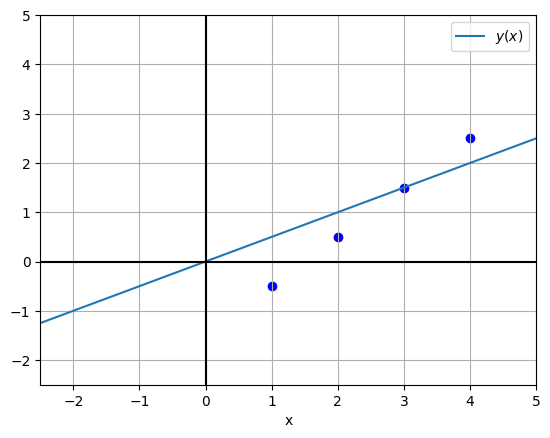

In [48]:

parameters = list(model.parameters())
A = parameters[0].item()  # Weight
def lin_func(x,A):
    return A*x

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

In [49]:
class LinModelBias(torch.nn.Module):

    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 0
b = -1

model = LinModelBias(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(-1., requires_grad=True)
A = 0.0
b = -1.0


In [50]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 5.25
Step 500, Loss: 0.07019560784101486
Step 1000, Loss: 0.05203142762184143
Step 1500, Loss: 0.03856758773326874
Step 2000, Loss: 0.028587706387043
Step 2500, Loss: 0.021190237253904343
Step 3000, Loss: 0.015706943348050117
Step 3500, Loss: 0.01164258923381567
Step 4000, Loss: 0.008629923686385155
Step 4500, Loss: 0.00639681052416563
Step 5000, Loss: 0.0047415741719305515
Step 5500, Loss: 0.0035146214067935944
Step 6000, Loss: 0.0026051716413348913
Step 6500, Loss: 0.00193104799836874
Step 7000, Loss: 0.0014313672436401248
Step 7500, Loss: 0.001060999813489616
Step 8000, Loss: 0.0007864611689001322
Step 8500, Loss: 0.0005829609581269324
Step 9000, Loss: 0.000432122586062178
Step 9500, Loss: 0.00032031763112172484
A = 0.9871755838394165
b = -1.4622949361801147


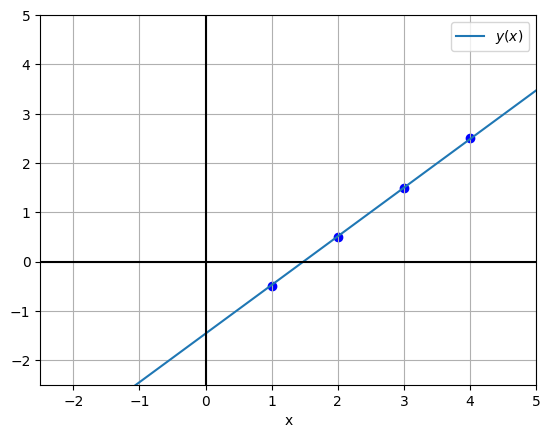

In [51]:
parameters = list(model.parameters())
A = parameters[0].item()  # Weight
b = parameters[1].item()  # Bias
def lin_func(x,A,b):
    return A*x+b

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A,b)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

4.4 Non-linear data

In [12]:
# next data which is non-linear
x_tensor = torch.tensor([1, 2, 3, 4])
y_tensor = torch.tensor([1,1,1.5,2.5])

In [13]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 0
b = -1

model = LinModel(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

A_plt = model.A.data.item()
b_plt = model.b.data.item()

Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(-1., requires_grad=True)
A = 0.0
b = -1.0
Step 0, Loss: 6.625
Step 500, Loss: 0.1784907430410385
Step 1000, Loss: 0.14847642183303833
Step 1500, Loss: 0.126228928565979
Step 2000, Loss: 0.10973823070526123
Step 2500, Loss: 0.09751472622156143
Step 3000, Loss: 0.08845420181751251
Step 3500, Loss: 0.08173821866512299
Step 4000, Loss: 0.07676007598638535
Step 4500, Loss: 0.07307007908821106
Step 5000, Loss: 0.07033493369817734
Step 5500, Loss: 0.0683075562119484
Step 6000, Loss: 0.06680478155612946
Step 6500, Loss: 0.06569083780050278
Step 7000, Loss: 0.06486520916223526
Step 7500, Loss: 0.06425317376852036
Step 8000, Loss: 0.06379950046539307
Step 8500, Loss: 0.06346326321363449
Step 9000, Loss: 0.06321398168802261
Step 9500, Loss: 0.06302926689386368
A = 0.5164846181869507
b = 0.20153392851352692


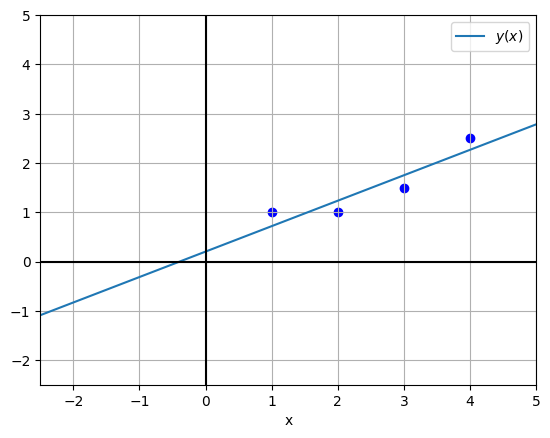

In [14]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A_plt,b_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

4.5 Linear model + ReLU

In [15]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLU(torch.nn.Module):
    def __init__(self, w=1.0, b=0.0):
        super().__init__()
        # Define the linear parameters
        self.w = torch.nn.Parameter(torch.tensor(float(w)))  # Weight
        self.b = torch.nn.Parameter(torch.tensor(float(b)))  # Bias

    def forward(self, x):
        # Linear transformation
        h = self.w * x + self.b
        # ReLU activation
        y = torch.relu(h)
        return y
    
w = 1
b = 0

model = NeuronModelWithReLU(w=w, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

A_plt = model.w.data.item()
b_plt = model.b.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w = 1.0
b = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.08004893362522125
Step 1000, Loss: 0.07550784200429916
Step 1500, Loss: 0.07214190810918808
Step 2000, Loss: 0.0696469247341156
Step 2500, Loss: 0.06779757887125015
Step 3000, Loss: 0.06642673909664154
Step 3500, Loss: 0.06541063636541367
Step 4000, Loss: 0.06465749442577362
Step 4500, Loss: 0.06409918516874313
Step 5000, Loss: 0.06368540972471237
Step 5500, Loss: 0.06337867677211761
Step 6000, Loss: 0.06315132975578308
Step 6500, Loss: 0.06298279762268066
Step 7000, Loss: 0.06285785138607025
Step 7500, Loss: 0.06276526302099228
Step 8000, Loss: 0.06269662827253342
Step 8500, Loss: 0.06264574825763702
Step 9000, Loss: 0.0626080334186554
Step 9500, Loss: 0.06258010864257812
w = 0.5064135193824768
b = 0.2311452478170395


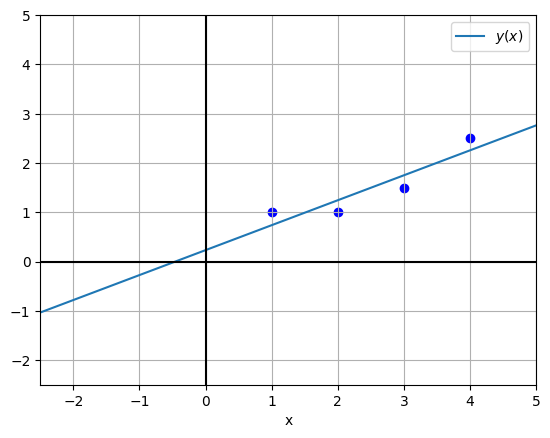

In [16]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A_plt,b_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

question for TØ: Am I doing this right? I use the parameters A,b that was outputted after training my LinearModel as the weight and bias parameter. I then feed h=w*x+b into ReLU.(h)

4.6 (Linear model + ReLU) × 2

In [17]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLUx2(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias2

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.relu(h1)
        # Linear transformation
        h2 = self.w2 * a1 + self.b2
        # ReLU activation
        y = torch.relu(h2)

        return y
    
w = 1
b = 0

model = NeuronModelWithReLUx2(w1=w, b1=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.07779781520366669
Step 1000, Loss: 0.07212861627340317
Step 1500, Loss: 0.06863006204366684
Step 2000, Loss: 0.06643667072057724
Step 2500, Loss: 0.06504503637552261
Step 3000, Loss: 0.06415392458438873
Step 3500, Loss: 0.06357923150062561
Step 4000, Loss: 0.0632065162062645
Step 4500, Loss: 0.06296371668577194
Step 5000, Loss: 0.06280498206615448
Step 5500, Loss: 0.06270091980695724
Step 6000, Loss: 0.0626324936747551
Step 6500, Loss: 0.06258752197027206
Step 7000, Loss: 0.06255784630775452
Step 7500, Loss: 0.062538281083107
Step 8000, Loss: 0.06252531707286835
Step 8500, Loss: 0.06251675635576248
Step 9000, Loss: 0.06251111626625061
Step 9500, Loss: 0.06250736117362976
w1 = 0.7039342522621155
b1 = 0.113

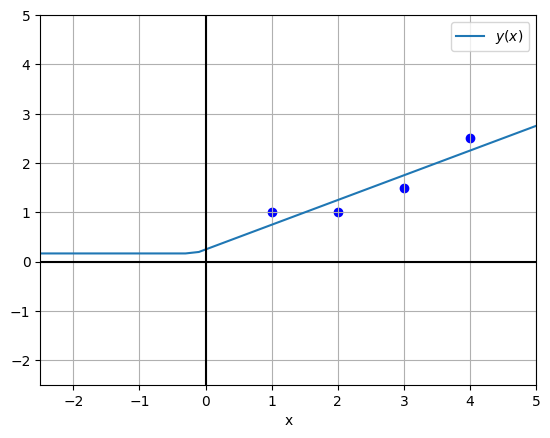

In [18]:
def funkyfunc(x,w1,b1,w2,b2):
    y = w2*torch.relu(w1 * x + b1)+b2
    return y

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

TØ: burde den ikke være non-linear?

4.7 Linear model + ReLU + Linear model

In [19]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLuAndAnotherLinear(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.relu(h1)
        # Linear transformation
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model with some starting values for w and b
w = 1.0
b = 0.0
model = NeuronModelWithReLuAndAnotherLinear(w1=w, b1=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.07779781520366669
Step 1000, Loss: 0.07212861627340317
Step 1500, Loss: 0.06863006204366684
Step 2000, Loss: 0.06643667072057724
Step 2500, Loss: 0.06504503637552261
Step 3000, Loss: 0.06415392458438873
Step 3500, Loss: 0.06357923150062561
Step 4000, Loss: 0.0632065162062645
Step 4500, Loss: 0.06296371668577194
Step 5000, Loss: 0.06280498206615448
Step 5500, Loss: 0.06270091980695724
Step 6000, Loss: 0.0626324936747551
Step 6500, Loss: 0.06258752197027206
Step 7000, Loss: 0.06255784630775452
Step 7500, Loss: 0.062538281083107
Step 8000, Loss: 0.06252531707286835
Step 8500, Loss: 0.06251675635576248
Step 9000, Loss: 0.06251111626625061
Step 9500, Loss: 0.06250736117362976
w1 = 0.7039342522621155
b1 = 0.113

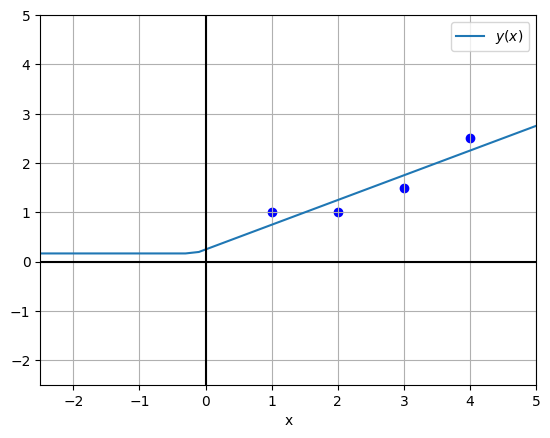

In [20]:
def funkyfunc(x,w1,b1,w2,b2):
    y = w2*torch.relu(w1 * x + b1)+b2
    return y

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

ex49: Activation functions

In [21]:
f = lambda x: x - 0.5
def g(x):
    x0 = 1.25
    return torch.where(x>x0, f(x), f(x0))

x_train = torch.tensor([-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4., ])
y_train = g(x_train)


In [22]:
# 5.2 ReLU

class Neuron49(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.relu(h1)
        # Linear transformation
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model
model = Neuron49(w1=1.0, b1=0.0)

# Set up an optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000
for step in range(steps):
    # Forward pass: make predictions
    y_pred = model(x_train)
    # Compute loss between model's predictions and custom-generated y_train
    loss = loss_fn(y_pred, y_train)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Print the final parameters after training
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 0.2750000059604645
Step 500, Loss: 0.11096793413162231
Step 1000, Loss: 0.09139209985733032
Step 1500, Loss: 0.07940275967121124
Step 2000, Loss: 0.07123095542192459
Step 2500, Loss: 0.06507781893014908
Step 3000, Loss: 0.060073595494031906
Step 3500, Loss: 0.05579356104135513
Step 4000, Loss: 0.05202747508883476
Step 4500, Loss: 0.048668477684259415
Step 5000, Loss: 0.04565849155187607
Step 5500, Loss: 0.04296233505010605
Step 6000, Loss: 0.04055460914969444
Step 6500, Loss: 0.03775825724005699
Step 7000, Loss: 0.033003244549036026
Step 7500, Loss: 0.02870088256895542
Step 8000, Loss: 0.024838974699378014
Step 8500, Loss: 0.02140885591506958
Step 9000, Loss: 0.018397754058241844
Step 9500, Loss: 0.015786102041602135
w1 = 0.8145

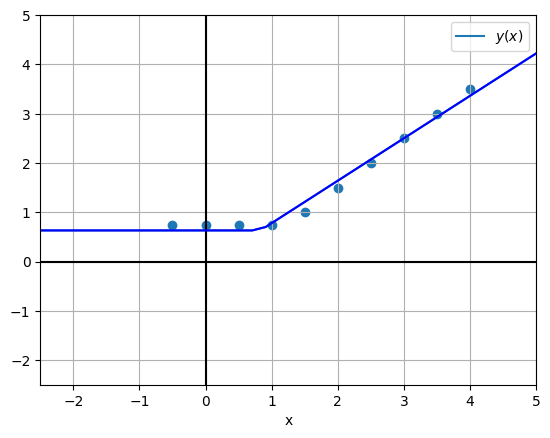

In [23]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = model(xs) #funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.plot(xs.detach().numpy(), ys.detach().numpy(), color='blue', label='Data points')  # Convert to numpy
plt.scatter(x_train,y_train)

plt.show()  # Display the plot

In [24]:
# 5.3 Leaky ReLU

class Neuron49(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.nn.LeakyReLU()(h1)
        # Linear transformation
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model
model = Neuron49(w1=1.0, b1=0.0)

# Set up an optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000
for step in range(steps):
    # Forward pass: make predictions
    y_pred = model(x_train)
    # Compute loss between model's predictions and custom-generated y_train
    loss = loss_fn(y_pred, y_train)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Print the final parameters after training
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 0.2757524847984314
Step 500, Loss: 0.1115487590432167
Step 1000, Loss: 0.09197863936424255
Step 1500, Loss: 0.08004038035869598
Step 2000, Loss: 0.07192297279834747
Step 2500, Loss: 0.06581442058086395
Step 3000, Loss: 0.060841530561447144
Step 3500, Loss: 0.0565793402493
Step 4000, Loss: 0.05281855911016464
Step 4500, Loss: 0.04945342615246773
Step 5000, Loss: 0.04642733186483383
Step 5500, Loss: 0.043706443160772324
Step 6000, Loss: 0.04126685857772827
Step 6500, Loss: 0.03876694291830063
Step 7000, Loss: 0.03401462361216545
Step 7500, Loss: 0.02969897910952568
Step 8000, Loss: 0.025805965065956116
Step 8500, Loss: 0.022329477593302727
Step 9000, Loss: 0.019259696826338768
Step 9500, Loss: 0.016580387949943542
w1 = 0.813887536

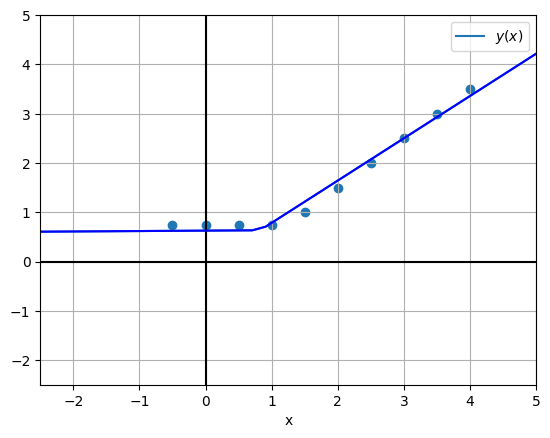

In [25]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = model(xs) #funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.plot(xs.detach().numpy(), ys.detach().numpy(), color='blue', label='Data points')  # Convert to numpy
plt.scatter(x_train,y_train)

plt.show()  # Display the plot

In [26]:
# 5.4 SiLU

class Neuron49(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        self.silu = torch.nn.SiLU()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        h1 = self.w1 * x + self.b1        
        a1 = self.silu(h1)
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model
model = Neuron49(w1=1.0, b1=0.0)

# Set up an optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000
for step in range(steps):
    # Forward pass: make predictions
    y_pred = model(x_train)
    # Compute loss between model's predictions and custom-generated y_train
    loss = loss_fn(y_pred, y_train)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Print the final parameters after training
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 0.23217880725860596
Step 500, Loss: 0.10602231323719025
Step 1000, Loss: 0.0774741843342781
Step 1500, Loss: 0.06533323973417282
Step 2000, Loss: 0.05968158692121506
Step 2500, Loss: 0.05664113909006119
Step 3000, Loss: 0.054661620408296585
Step 3500, Loss: 0.05311565473675728
Step 4000, Loss: 0.05174802988767624
Step 4500, Loss: 0.05045487359166145
Step 5000, Loss: 0.049194227904081345
Step 5500, Loss: 0.04794948548078537
Step 6000, Loss: 0.04671446606516838
Step 6500, Loss: 0.045487284660339355
Step 7000, Loss: 0.04426773265004158
Step 7500, Loss: 0.043056320399045944
Step 8000, Loss: 0.04185394197702408
Step 8500, Loss: 0.04066171497106552
Step 9000, Loss: 0.039480600506067276
Step 9500, Loss: 0.03831173852086067
w1 = 0.79680

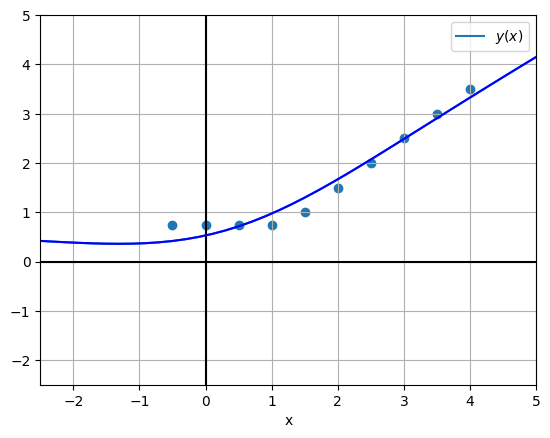

In [27]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = model(xs) #funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.plot(xs.detach().numpy(), ys.detach().numpy(), color='blue', label='Data points')  # Convert to numpy
plt.scatter(x_train,y_train)

plt.show()  # Display the plot

5.5 Softplus

In [28]:
class Neuron49(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        self.softplus = torch.nn.Softplus()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        x.view(-1, 1)
        h1 = self.w1 * x + self.b1        
        a1 = self.softplus(h1)
        y = self.w2 * a1 + self.b2
        return y.flatten()
    
# Initialize the model
model = Neuron49(w1=1.0, b1=0.0)

# Set up an optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000
for step in range(steps):
    # Forward pass: make predictions
    y_pred = model(x_train)
    # Compute loss between model's predictions and custom-generated y_train
    loss = loss_fn(y_pred, y_train)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Print the final parameters after training
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 0.25170356035232544
Step 500, Loss: 0.053489334881305695
Step 1000, Loss: 0.052787117660045624
Step 1500, Loss: 0.05225411057472229
Step 2000, Loss: 0.05179531127214432
Step 2500, Loss: 0.051368944346904755
Step 3000, Loss: 0.05095664784312248
Step 3500, Loss: 0.050550270825624466
Step 4000, Loss: 0.05014632269740105
Step 4500, Loss: 0.049743350595235825
Step 5000, Loss: 0.049340687692165375
Step 5500, Loss: 0.04893806204199791
Step 6000, Loss: 0.048535414040088654
Step 6500, Loss: 0.048132799565792084
Step 7000, Loss: 0.04773031920194626
Step 7500, Loss: 0.04732796549797058
Step 8000, Loss: 0.046925827860832214
Step 8500, Loss: 0.046524085104465485
Step 9000, Loss: 0.04612245410680771
Step 9500, Loss: 0.045721475034952164
w1 = 

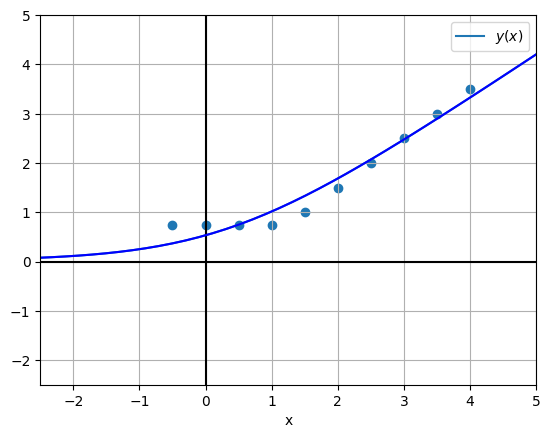

In [29]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = model(xs) #funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.plot(xs.detach().numpy(), ys.detach().numpy(), color='blue', label='Data points')  # Convert to numpy
plt.scatter(x_train,y_train)

plt.show()  # Display the plot

In [30]:
# Define training loop
steps = 10000
learning_rate = 0.01

for name, model in models.items():
    print(f"\nTraining model with {name} activation:")
    
    # Define an optimizer for each model
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = torch.nn.MSELoss()
    
    for step in range(steps):
        # Reshape x_train for compatibility
        x_train = x_train.view(-1, 1)
        
        # Forward pass: make predictions
        y_pred = model(x_train)
        
        # Compute loss between model's predictions and y_train
        loss = loss_fn(y_pred, y_train.view(-1, 1))
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print loss every 500 steps
        if step % 500 == 0:
            print(f"Step {step}, Loss: {loss.item()}")
    
    # Print the final parameters after training
    print(f"\nFinal parameters for model with {name} activation:")
    for param_name, parameter in model.named_parameters():
        print(param_name, '=', parameter.data)



NameError: name 'models' is not defined

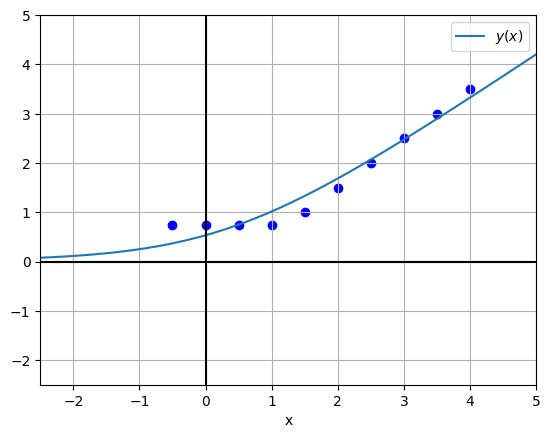

In [ ]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True).view(-1, 1)  # Reshape to (100, 1)
ys = model(xs)  # Now this should work

with torch.no_grad():
    ax.plot(xs.detach().numpy(), ys.detach().numpy(), label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_train.detach().numpy(), y_train.detach().numpy(), color='blue', label='Data points')  # Convert to numpy

plt.show()  # Display the plot


Ex50: 6.2 Networks that rotate in 2D

In [ ]:
x_tensor_in = torch.tensor([0.5,1.0,1.5,0.5,1.0,1.5])
y_tensor_in = torch.tensor([0,0,0,0.2,0.2,0.7])

x_tensor_out = torch.tensor([0.433, 0.866, 1.299, 0.333, 0.766, 0.949])
y_tensor_out = torch.tensor([0.2500, 0.5000, 0.7500, 0.4232, 0.6732, 1.3562])


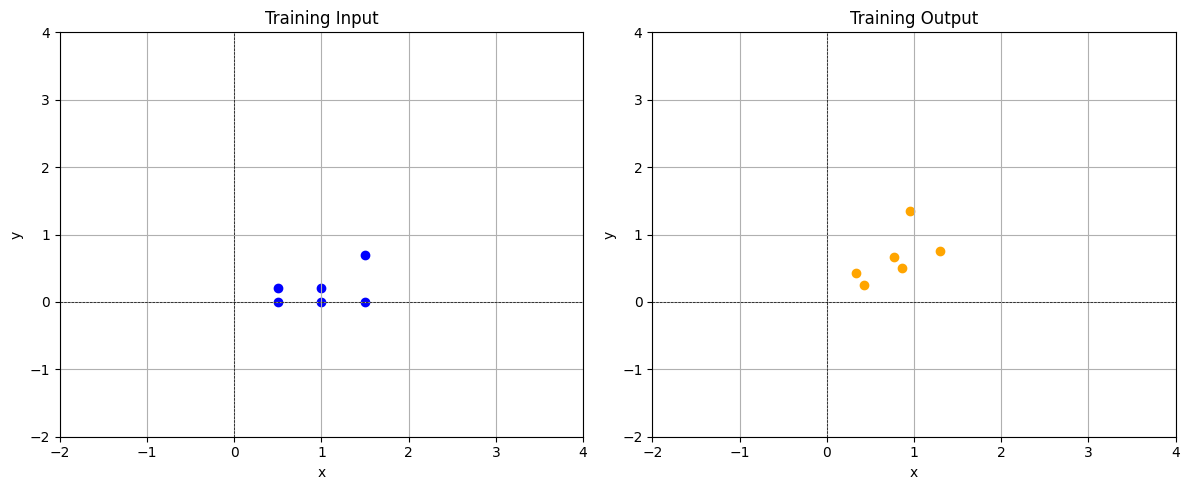

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Training Input
axs[0].scatter(x_tensor_in.numpy(), y_tensor_in.numpy(), color='blue')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Training Input')
axs[0].grid(True)
axs[0].set_xlim(-2, 4)
axs[0].set_ylim(-2, 4)
axs[0].axhline(0, color='k', linewidth=0.5, linestyle='--')
axs[0].axvline(0, color='k', linewidth=0.5, linestyle='--')

# Right plot: Training Output (placeholder for now)
axs[1].scatter(x_tensor_out.numpy(), y_tensor_out.numpy(), marker='o', color='orange')  # Example line plot
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Training Output')
axs[1].grid(True)
axs[1].set_xlim(-2, 4)
axs[1].set_ylim(-2, 4)
axs[1].axhline(0, color='k', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='k', linewidth=0.5, linestyle='--')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

6.3 train the model on the input and output data

In [ ]:
import torch.nn as nn

# Define the linear model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # 2x2 linear layer without bias
        self.linear = nn.Linear(2, 2, bias=False) # asked not to train for bias, so set to False

    def forward(self, x):
        return self.linear(x)

# Define the input and output points
input_points = torch.tensor([[0.5, 0.0],
                              [1.0, 0.0],
                              [1.5, 0.0],
                              [0.5, 0.2],
                              [1.0, 0.2],
                              [1.5, 0.7]], dtype=torch.float32)

output_points = torch.tensor([[0.433, 0.25],
                               [0.866, 0.50],
                               [1.299, 0.75],
                               [0.333, 0.4232],
                               [0.766, 0.6732],
                               [0.949, 1.3562]], dtype=torch.float32)

# Instantiate the model
model = LinearModel()

# Define the loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer =  torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)

    # Compute loss
    loss = loss_fn(y_pred, output_points)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters (weights)
print("Learned parameters (weights):")
print(model.linear.weight.data)

model_tensor = model.linear.weight.data


Epoch 0, Loss: 0.11780617386102676
Epoch 500, Loss: 0.007664170581847429
Epoch 1000, Loss: 0.004662682767957449
Epoch 1500, Loss: 0.002836860716342926
Epoch 2000, Loss: 0.0017259895103052258
Epoch 2500, Loss: 0.0010501211509108543
Epoch 3000, Loss: 0.0006389105110429227
Epoch 3500, Loss: 0.0003887227503582835
Epoch 4000, Loss: 0.00023650622460991144
Epoch 4500, Loss: 0.00014389482385013252
Epoch 5000, Loss: 8.75490004546009e-05
Epoch 5500, Loss: 5.326649989001453e-05
Epoch 6000, Loss: 3.240861769882031e-05
Epoch 6500, Loss: 1.9718290786840953e-05
Epoch 7000, Loss: 1.199728012579726e-05
Epoch 7500, Loss: 7.299684057215927e-06
Epoch 8000, Loss: 4.441576948011061e-06
Epoch 8500, Loss: 2.70270652436011e-06
Epoch 9000, Loss: 1.6445982282675686e-06
Epoch 9500, Loss: 1.000966108222201e-06
Learned parameters (weights):
tensor([[ 0.8660, -0.4999],
        [ 0.5010,  0.8611]])


In [ ]:
# linear model without bias
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 2, bias=False)  # 2x2 layer without bias

    def forward(self, x):
        return self.linear(x)

model = LinearModel()

# prepare input data points
input_data = torch.tensor([[0.5, 0.0],
                            [1.0, 0.0],
                            [1.5, 0.0],
                            [0.5, 0.2],
                            [1.0, 0.2],
                            [1.5, 0.7]], dtype=torch.float32)

# pass the input data through the model; running the code again rotates the points further
transformed_data = model(input_data)

# print
print("Transformed Data from Model:")
print(transformed_data)


Transformed Data from Model:
tensor([[-0.0408,  0.2858],
        [-0.0817,  0.5716],
        [-0.1225,  0.8574],
        [-0.0298,  0.3116],
        [-0.0707,  0.5974],
        [-0.0840,  0.9478]], grad_fn=<MmBackward0>)


/tmp/ipykernel_78990/1176489394.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


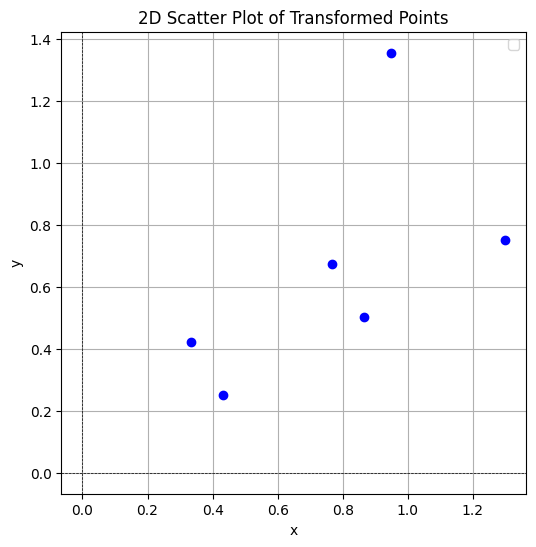

In [ ]:
# the rotation matrix found by training is applied to each of the original 6 points (input points on tensor form) 
output_points_predicted = torch.matmul(input_points,model_tensor.T)

# Convert tensor to numpy for plotting
output_points_predicted_plotform = output_points_predicted.detach().numpy()

# Extract x and y coordinates
x_coords = output_points_predicted_plotform[:, 0]
y_coords = output_points_predicted_plotform[:, 1]

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title("2D Scatter Plot of Transformed Points")
plt.legend()
plt.grid(True)
plt.show()

6.4 linear model WITH bias this time

In [ ]:
import torch.nn as nn

# Define the linear model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # 2x2 linear layer without bias
        self.linear = nn.Linear(2, 2, bias=True) # now set bias to True, lol

    def forward(self, x):
        return self.linear(x)

# Define the input and output points
input_points = torch.tensor([[0.5, 0.0],
                              [1.0, 0.0],
                              [1.5, 0.0],
                              [0.5, 0.2],
                              [1.0, 0.2],
                              [1.5, 0.7]], dtype=torch.float32)

output_points = torch.tensor([[0.433, 0.25],
                               [0.866, 0.50],
                               [1.299, 0.75],
                               [0.333, 0.4232],
                               [0.766, 0.6732],
                               [0.949, 1.3562]], dtype=torch.float32)

# Instantiate the model
model = LinearModel()

# Define the loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer =  torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)

    # Compute loss
    loss = loss_fn(y_pred, output_points)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters (weights)
print("Learned parameters (weights):")
print(model.linear.weight.data)
print(model.linear.bias.data)

model_tensor = model.linear.weight.data


Epoch 0, Loss: 0.791636049747467
Epoch 500, Loss: 0.015229334123432636
Epoch 1000, Loss: 0.009237421676516533
Epoch 1500, Loss: 0.0056919618509709835
Epoch 2000, Loss: 0.0035458561033010483
Epoch 2500, Loss: 0.002225367585197091
Epoch 3000, Loss: 0.0014035645872354507
Epoch 3500, Loss: 0.000888150476384908
Epoch 4000, Loss: 0.0005632179672829807
Epoch 4500, Loss: 0.00035766325891017914
Epoch 5000, Loss: 0.00022733786317985505
Epoch 5500, Loss: 0.000144587189424783
Epoch 6000, Loss: 9.199319174513221e-05
Epoch 6500, Loss: 5.854609844391234e-05
Epoch 7000, Loss: 3.7265843275235966e-05
Epoch 7500, Loss: 2.3723092454019934e-05
Epoch 8000, Loss: 1.5103191799425986e-05
Epoch 8500, Loss: 9.616106581233907e-06
Epoch 9000, Loss: 6.122656486695632e-06
Epoch 9500, Loss: 3.898854174622102e-06
Learned parameters (weights):
tensor([[ 0.8643, -0.4962],
        [ 0.5038,  0.8575]])
tensor([ 0.0011, -0.0023])


/tmp/ipykernel_78990/1176489394.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


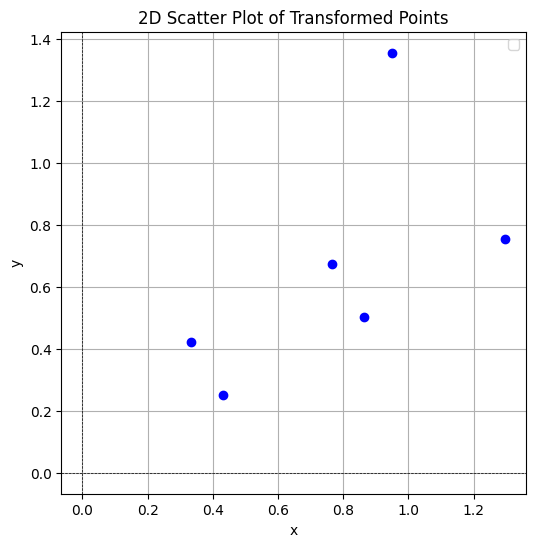

In [ ]:
# the rotation matrix found by training is applied to each of the original 6 points (input points on tensor form) 
output_points_predicted = torch.matmul(input_points,model_tensor.T)

# Convert tensor to numpy for plotting
output_points_predicted_plotform = output_points_predicted.detach().numpy()

# Extract x and y coordinates
x_coords = output_points_predicted_plotform[:, 0]
y_coords = output_points_predicted_plotform[:, 1]

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title("2D Scatter Plot of Transformed Points")
plt.legend()
plt.grid(True)
plt.show()

6.6 Two linear models with bias

In [ ]:
import torch.nn as nn

# Define the linear model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # 2x2 linear layer without bias
        self.layer1 = nn.Linear(2, 2, bias=True)
        self.layer2 = nn.Linear(2, 2, bias=True)

    def forward(self, x):
        # pass it through twice!
        x = self.layer1(x)
        return self.layer2(x)

# Define the input and output points
input_points = torch.tensor([[0.5, 0.0],
                              [1.0, 0.0],
                              [1.5, 0.0],
                              [0.5, 0.2],
                              [1.0, 0.2],
                              [1.5, 0.7]], dtype=torch.float32)

output_points = torch.tensor([[0.433, 0.25],
                               [0.866, 0.50],
                               [1.299, 0.75],
                               [0.333, 0.4232],
                               [0.766, 0.6732],
                               [0.949, 1.3562]], dtype=torch.float32)

# Instantiate the model
model = LinearModel()

# Define the loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer =  torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)

    # Compute loss
    loss = loss_fn(y_pred, output_points)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters (weights)
print("Learned parameters (weights):")
print(model.layer2.weight.data)
print(model.layer2.bias.data)

model_tensor = model.layer2.weight.data


Epoch 0, Loss: 0.7629399299621582
Epoch 500, Loss: 0.04368862882256508
Epoch 1000, Loss: 0.031863484531641006
Epoch 1500, Loss: 0.02515382319688797
Epoch 2000, Loss: 0.020427430048584938
Epoch 2500, Loss: 0.01628338359296322
Epoch 3000, Loss: 0.0123147489503026
Epoch 3500, Loss: 0.008648226968944073
Epoch 4000, Loss: 0.005585541483014822
Epoch 4500, Loss: 0.0033231244888156652
Epoch 5000, Loss: 0.0018404285656288266
Epoch 5500, Loss: 0.0009633394074626267
Epoch 6000, Loss: 0.00048418602091260254
Epoch 6500, Loss: 0.00023694208357483149
Epoch 7000, Loss: 0.00011411228479119018
Epoch 7500, Loss: 5.4500080295838416e-05
Epoch 8000, Loss: 2.5942348656826653e-05
Epoch 8500, Loss: 1.2345158211246599e-05
Epoch 9000, Loss: 5.882798632228514e-06
Epoch 9500, Loss: 2.809729039654485e-06
Learned parameters (weights):
tensor([[ 0.3219, -0.6643],
        [ 0.9167,  0.4943]])
tensor([-0.4484, -0.1977])


/tmp/ipykernel_78990/1176489394.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


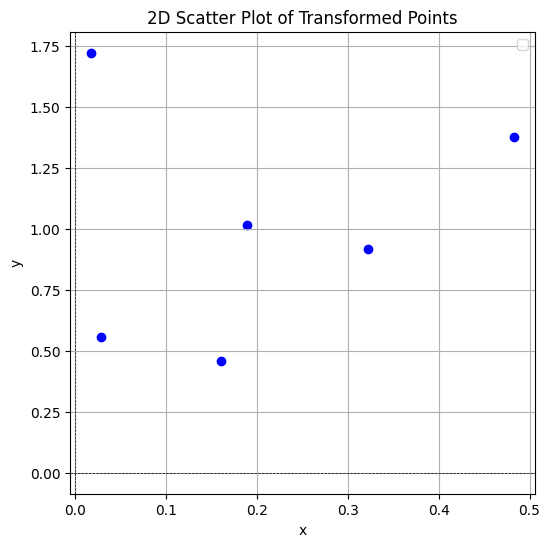

In [ ]:
# the rotation matrix found by training is applied to each of the original 6 points (input points on tensor form) 
output_points_predicted = torch.matmul(input_points,model_tensor.T)

# Convert tensor to numpy for plotting
output_points_predicted_plotform = output_points_predicted.detach().numpy()

# Extract x and y coordinates
x_coords = output_points_predicted_plotform[:, 0]
y_coords = output_points_predicted_plotform[:, 1]

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title("2D Scatter Plot of Transformed Points")
plt.legend()
plt.grid(True)
plt.show()

TØ: this no longer rotates by 30 degrees but by some other degree and also deforms the shape

In [ ]:
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # 2x2 linear layer without bias
        self.layer = nn.Linear(2, 2, bias=True)

    def forward(self, x):
        # pass it through twice!
        return self.layer(x)

# Define the original points as a tensor
input_points = torch.tensor([[2.5, 1.0],
                                [3.0, 1.0],
                                [3.5, 1.0],
                                [2.5, 1.2],
                                [3.0, 1.2],
                                [3.5, 1.7]], dtype=torch.float32)

# Define the rotated/transformed output points as a tensor
output_points = torch.tensor([[2.433, 1.25],
                              [2.866, 1.50],
                              [3.299, 1.75],
                              [2.333, 1.4232],
                              [2.766, 1.6732],
                              [2.949, 2.3562]], dtype=torch.float32)

# Instantiate the model
model = LinearModel()

# Define the loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer =  torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)

    # Compute loss
    loss = loss_fn(y_pred, output_points)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters (weights)
print("Learned parameters (weights):")
print(model.layer.weight.data)
# print("Learned parameters (bias):")
# print(model.layer.bias.data)

model_tensor = model.layer.weight.data


Epoch 0, Loss: 3.016291379928589
Epoch 500, Loss: 0.017968611791729927
Epoch 1000, Loss: 0.015101131051778793
Epoch 1500, Loss: 0.012751374393701553
Epoch 2000, Loss: 0.010805461555719376
Epoch 2500, Loss: 0.009180624037981033
Epoch 3000, Loss: 0.007815354503691196
Epoch 3500, Loss: 0.00666266493499279
Epoch 4000, Loss: 0.005686014890670776
Epoch 4500, Loss: 0.004856275860220194
Epoch 5000, Loss: 0.004149980377405882
Epoch 5500, Loss: 0.0035478651989251375
Epoch 6000, Loss: 0.0030340233352035284
Epoch 6500, Loss: 0.002595180179923773
Epoch 7000, Loss: 0.0022201749961823225
Epoch 7500, Loss: 0.00189957523252815
Epoch 8000, Loss: 0.0016254099318757653
Epoch 8500, Loss: 0.0013909029075875878
Epoch 9000, Loss: 0.0011902888072654605
Epoch 9500, Loss: 0.0010186446597799659
Learned parameters (weights):
tensor([[ 0.9289, -0.4593],
        [ 0.4449,  0.8306]])


tensor([[2.5000, 1.0000],
        [3.0000, 1.0000],
        [3.5000, 1.0000],
        [2.5000, 1.2000],
        [3.0000, 1.2000],
        [3.5000, 1.7000]])
tensor([[ 0.9289, -0.4593],
        [ 0.4449,  0.8306]])
tensor([[1.8628, 1.9428],
        [2.3272, 2.1653],
        [2.7917, 2.3877],
        [1.7710, 2.1089],
        [2.2354, 2.3314],
        [2.4702, 2.9691]])


/tmp/ipykernel_78990/1232861891.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


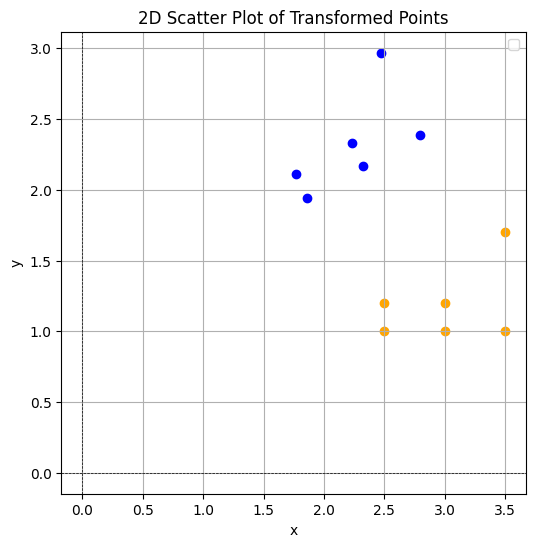

In [ ]:
# the rotation matrix found by training is applied to each of the original 6 points (input points on tensor form) 
output_points_predicted = torch.matmul(input_points,model_tensor.T)

print(input_points)
print(model_tensor)
print(output_points_predicted)

# Convert tensor to numpy for plotting
output_points_predicted_plotform = output_points_predicted.detach().numpy()

x_org = input_points[:, 0].numpy().tolist()
y_org = input_points[:, 1].numpy().tolist()

# Extract x and y coordinates
x_coords = output_points_predicted_plotform[:, 0]
y_coords = output_points_predicted_plotform[:, 1]

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue')
plt.scatter(x_org,y_org,color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title("2D Scatter Plot of Transformed Points")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # 2x2 linear layer without bias
        self.layer = nn.Linear(2, 2, bias=True)
        self.center = torch.tensor([2.0, 1.0], dtype=torch.float32)


    def forward(self, x):
        # Shift points so that rotation is around the origin
        x_shifted = x - self.center
        
        # Apply rotation matrix (through the linear layer)
        rotated_shifted = self.layer(x_shifted)
        
        # Shift points back to original position
        x_rotated = rotated_shifted + self.center
        return x_rotated

# Define the original points as a tensor
input_points = torch.tensor([[2.5, 1.0],
                                [3.0, 1.0],
                                [3.5, 1.0],
                                [2.5, 1.2],
                                [3.0, 1.2],
                                [3.5, 1.7]], dtype=torch.float32)

# Define the rotated/transformed output points as a tensor
output_points = torch.tensor([[2.433, 1.25],
                              [2.866, 1.50],
                              [3.299, 1.75],
                              [2.333, 1.4232],
                              [2.766, 1.6732],
                              [2.949, 2.3562]], dtype=torch.float32)

# Instantiate the model
model = LinearModel()

# Define the loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer =  torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)

    # Compute loss
    loss = loss_fn(y_pred, output_points)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters (weights)
print("Learned parameters (weights):")
print(model.layer.weight.data)
# print("Learned parameters (bias):")
# print(model.layer.bias.data)

model_tensor = model.layer.weight.data

Epoch 0, Loss: 0.6199834942817688


Epoch 500, Loss: 0.006136333104223013
Epoch 1000, Loss: 0.003512715222314
Epoch 1500, Loss: 0.0020737971644848585
Epoch 2000, Loss: 0.0012532082619145513
Epoch 2500, Loss: 0.000770188809838146
Epoch 3000, Loss: 0.0004789370868820697
Epoch 3500, Loss: 0.00030021535349078476
Epoch 4000, Loss: 0.00018919679860118777
Epoch 4500, Loss: 0.00011965679004788399
Epoch 5000, Loss: 7.585423736600205e-05
Epoch 5500, Loss: 4.8160527512663975e-05
Epoch 6000, Loss: 3.060779636143707e-05
Epoch 6500, Loss: 1.946561133081559e-05
Epoch 7000, Loss: 1.2384574802126735e-05
Epoch 7500, Loss: 7.882033060013782e-06
Epoch 8000, Loss: 5.017493094783276e-06
Epoch 8500, Loss: 3.194688588337158e-06
Epoch 9000, Loss: 2.0342795323813334e-06
Epoch 9500, Loss: 1.2956288628629409e-06
Learned parameters (weights):
tensor([[ 0.8649, -0.4974],
        [ 0.5021,  0.8613]])


tensor([[2.5000, 1.0000],
        [3.0000, 1.0000],
        [3.5000, 1.0000],
        [2.5000, 1.2000],
        [3.0000, 1.2000],
        [3.5000, 1.7000]])
tensor([[ 0.8649, -0.4974],
        [ 0.5021,  0.8613]])
tensor([[1.6648, 2.1165],
        [2.0972, 2.3675],
        [2.5296, 2.6186],
        [1.5653, 2.2887],
        [1.9977, 2.5398],
        [2.1814, 3.2214]])


/tmp/ipykernel_78990/1232861891.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


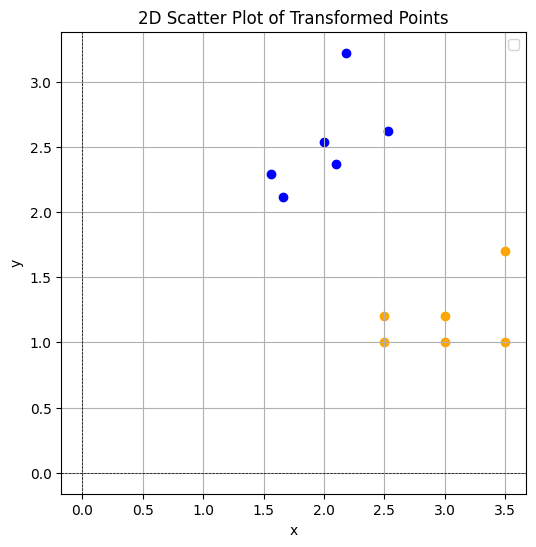

In [ ]:
# the rotation matrix found by training is applied to each of the original 6 points (input points on tensor form) 
output_points_predicted = torch.matmul(input_points,model_tensor.T)

print(input_points)
print(model_tensor)
print(output_points_predicted)

# Convert tensor to numpy for plotting
output_points_predicted_plotform = output_points_predicted.detach().numpy()

x_org = input_points[:, 0].numpy().tolist()
y_org = input_points[:, 1].numpy().tolist()

# Extract x and y coordinates
x_coords = output_points_predicted_plotform[:, 0]
y_coords = output_points_predicted_plotform[:, 1]

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue')
plt.scatter(x_org,y_org,color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title("2D Scatter Plot of Transformed Points")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
R = model.layer.weight.data  # Learned 2x2 rotation matrix
center = torch.tensor([2.0, 1.0], dtype=torch.float32)

# Define the input points
input_points = torch.tensor([[2.5, 1.0],
                             [3.0, 1.0],
                             [3.5, 1.0],
                             [2.5, 1.2],
                             [3.0, 1.2],
                             [3.5, 1.7]], dtype=torch.float32)

# Apply the transformation to rotate around [2, 1]
# Step 1: Shift points to origin
shifted_points = input_points - center

# Step 2: Apply rotation
rotated_shifted_points = torch.matmul(shifted_points, R.T)

# Step 3: Shift points back to original center
output_points_calculated = rotated_shifted_points + center

print("Transformed points:")
print(output_points_calculated)


Transformed points:
tensor([[2.4324, 1.2510],
        [2.8649, 1.5021],
        [3.2973, 1.7531],
        [2.3330, 1.4233],
        [2.7654, 1.6743],
        [2.9491, 2.3560]])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model that includes shifts and rotation
class TransformationModel(nn.Module):
    def __init__(self):
        super(TransformationModel, self).__init__()
        
        # Initial translation vector (to center rotation)
        self.initial_shift = nn.Parameter(torch.tensor([0.0, 0.0], dtype=torch.float32))
        
        # Rotation matrix (2x2 matrix as parameters)
        self.rotation_matrix = nn.Linear(2, 2, bias=False)  # 2x2 matrix, no bias
        
        # Final translation vector (to move back)
        self.final_shift = nn.Parameter(torch.tensor([0.0, 0.0], dtype=torch.float32))

    def forward(self, x):
        # Apply initial shift to move rotation center to the origin
        x_shifted = x + self.initial_shift
        
        # Apply the learned rotation matrix
        x_rotated = self.rotation_matrix(x_shifted)
        
        # Apply final shift to move back to the original center
        x_transformed = x_rotated + self.final_shift
        return x_transformed

# Define the input and output points
input_points = torch.tensor([[2.5, 1.0],
                             [3.0, 1.0],
                             [3.5, 1.0],
                             [2.5, 1.2],
                             [3.0, 1.2],
                             [3.5, 1.7]], dtype=torch.float32)

output_points = torch.tensor([[2.433, 1.25],
                              [2.866, 1.50],
                              [3.299, 1.75],
                              [2.333, 1.4232],
                              [2.766, 1.6732],
                              [2.949, 2.3562]], dtype=torch.float32)

# Instantiate the model, loss function, and optimizer
model = TransformationModel()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)
    
    # Compute loss
    loss = loss_fn(y_pred, output_points)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters
print("Learned initial shift:", model.initial_shift.data)
print("Learned rotation matrix:", model.rotation_matrix.weight.data)
print("Learned final shift:", model.final_shift.data)


Epoch 0, Loss: 0.7370861172676086
Epoch 1000, Loss: 0.01177662331610918
Epoch 2000, Loss: 0.006322485860437155
Epoch 3000, Loss: 0.003392905928194523
Epoch 4000, Loss: 0.0018094287952408195
Epoch 5000, Loss: 0.0009619579650461674
Epoch 6000, Loss: 0.0005128331831656396
Epoch 7000, Loss: 0.00027558350120671093
Epoch 8000, Loss: 0.00014973519137129188
Epoch 9000, Loss: 8.233452535932884e-05
Learned initial shift: tensor([ 0.1302, -0.3998])
Learned rotation matrix: tensor([[ 0.8761, -0.4953],
        [ 0.4803,  0.8640]])
Learned final shift: tensor([ 0.4195, -0.5207])


/tmp/ipykernel_78990/1249459982.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


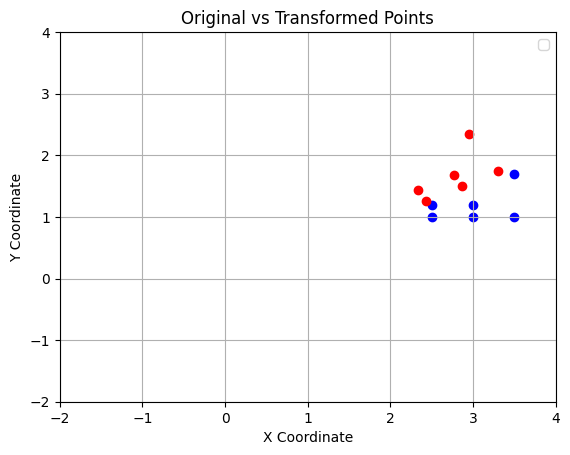

In [ ]:
# Apply the trained model to the input points
transformed_points = model(input_points).detach().numpy()  # Get the transformed points as numpy array for plotting
input_points_np = input_points.numpy()  # Convert the input points to numpy array

# Separate x and y coordinates for both original and transformed points
input_x, input_y = input_points_np[:, 0], input_points_np[:, 1]
transformed_x, transformed_y = transformed_points[:, 0], transformed_points[:, 1]

# Plot the original input points
plt.scatter(input_x, input_y, color='blue')

# Plot the transformed points
plt.scatter(transformed_x, transformed_y, color='red')

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Original vs Transformed Points')
plt.xlim(-2,4)
plt.ylim(-2,4)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


6.9 Twho linear models with bias

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model that includes shifts and rotation
class TransformationModel(nn.Module):
    def __init__(self):
        super(TransformationModel, self).__init__()
        
        # Initial translation vector (to center rotation)
        self.initial_shift = nn.Parameter(torch.tensor([0.0, 0.0], dtype=torch.float32))
        
        #1 Rotation matrix (2x2 matrix as parameters)
        self.rotation_matrix1 = nn.Linear(2, 2, bias=False)  # 2x2 matrix, no bias
        
        #1 Final translation vector (to move back)
        self.final_shift1 = nn.Parameter(torch.tensor([0.0, 0.0], dtype=torch.float32))

        #2 Rotation matrix (2x2 matrix as parameters)
        self.rotation_matrix2 = nn.Linear(2, 2, bias=False)  # 2x2 matrix, no bias
        
        #2 Final translation vector (to move back)
        self.final_shift2 = nn.Parameter(torch.tensor([0.0, 0.0], dtype=torch.float32))

    def forward(self, x):
        # Apply initial shift to move rotation center to the origin
        x_shifted = x + self.initial_shift
        
        # Apply the learned rotation matrix
        x_rotated = self.rotation_matrix1(x_shifted)
        
        # Apply final shift to move back to the original center
        x_transformed = x_rotated + self.final_shift1

        # AGAIN
        # Apply initial shift to move rotation center to the origin
        x_shifted = x + x_transformed
        
        # Apply the learned rotation matrix
        x_rotated = self.rotation_matrix2(x_shifted)
        
        # Apply final shift to move back to the original center
        x_transformed = x_rotated + self.final_shift2

        return x_transformed

# Define the input and output points
input_points = torch.tensor([[2.5, 1.0],
                             [3.0, 1.0],
                             [3.5, 1.0],
                             [2.5, 1.2],
                             [3.0, 1.2],
                             [3.5, 1.7]], dtype=torch.float32)

output_points = torch.tensor([[2.433, 1.25],
                              [2.866, 1.50],
                              [3.299, 1.75],
                              [2.333, 1.4232],
                              [2.766, 1.6732],
                              [2.949, 2.3562]], dtype=torch.float32)

# Instantiate the model, loss function, and optimizer
model = TransformationModel()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)
    
    # Compute loss
    loss = loss_fn(y_pred, output_points)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters
print("Learned initial shift:", model.initial_shift.data)
print("Learned rotation matrix1:", model.rotation_matrix1.weight.data)
print("Learned final shift1:", model.final_shift1.data)
print("Learned rotation matrix2:", model.rotation_matrix2.weight.data)
print("Learned final shift2:", model.final_shift2.data)


Epoch 0, Loss: 4.709301948547363
Epoch 1000, Loss: 0.02536730282008648
Epoch 2000, Loss: 0.009779305197298527
Epoch 3000, Loss: 0.00441809743642807
Epoch 4000, Loss: 0.002360239392146468
Epoch 5000, Loss: 0.001341222901828587
Epoch 6000, Loss: 0.0007698701811023057
Epoch 7000, Loss: 0.00044100373634137213
Epoch 8000, Loss: 0.0002517061657272279
Epoch 9000, Loss: 0.00014322329661808908
Learned initial shift: tensor([-0.0464, -0.1251])
Learned rotation matrix1: tensor([[ 0.6771, -0.1996],
        [ 0.6824,  0.4492]])
Learned final shift1: tensor([ 0.1695, -0.2316])
Learned rotation matrix2: tensor([[ 0.6303, -0.2557],
        [ 0.0397,  0.5997]])
Learned final shift2: tensor([ 0.5286, -0.6014])


/tmp/ipykernel_78990/1249459982.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


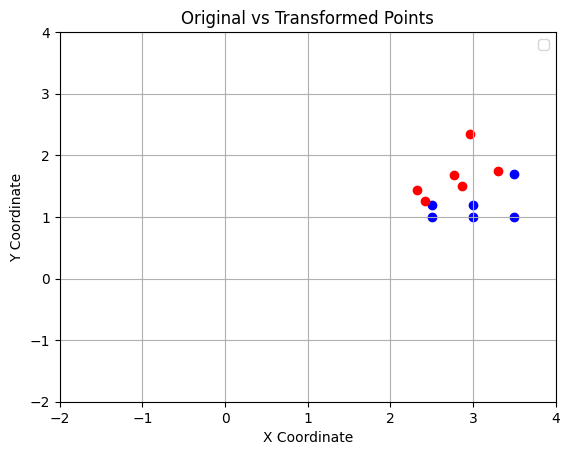

In [ ]:
# Apply the trained model to the input points
transformed_points = model(input_points).detach().numpy()  # Get the transformed points as numpy array for plotting
input_points_np = input_points.numpy()  # Convert the input points to numpy array

# Separate x and y coordinates for both original and transformed points
input_x, input_y = input_points_np[:, 0], input_points_np[:, 1]
transformed_x, transformed_y = transformed_points[:, 0], transformed_points[:, 1]

# Plot the original input points
plt.scatter(input_x, input_y, color='blue')

# Plot the transformed points
plt.scatter(transformed_x, transformed_y, color='red')

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Original vs Transformed Points')
plt.xlim(-2,4)
plt.ylim(-2,4)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


6.10 Two linear models without bias

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model that includes shifts and rotation
class TransformationModel(nn.Module):
    def __init__(self):
        super(TransformationModel, self).__init__()
        
        # Initial translation vector (to center rotation)
        self.initial_shift = nn.Parameter(torch.tensor([0.0, 0.0], dtype=torch.float32))
        
        #1 Rotation matrix (2x2 matrix as parameters)
        self.rotation_matrix1 = nn.Linear(2, 2, bias=False)  # 2x2 matrix, no inherent bias

        #2 Rotation matrix (2x2 matrix as parameters)
        self.rotation_matrix2 = nn.Linear(2, 2, bias=False)  # 2x2 matrix, no inherent bias

    def forward(self, x):
        
        # Apply the learned rotation matrix
        x_rotated = self.rotation_matrix1(x)
        
        # Apply final shift to move back to the original center
        x_transformed = x_rotated

        # AGAIN
        
        # Apply the learned rotation matrix
        x_rotated = self.rotation_matrix2(x)
        
        # Apply final shift to move back to the original center
        x_transformed = x_rotated

        return x_transformed

# Define the input and output points
input_points = torch.tensor([[2.5, 1.0],
                             [3.0, 1.0],
                             [3.5, 1.0],
                             [2.5, 1.2],
                             [3.0, 1.2],
                             [3.5, 1.7]], dtype=torch.float32)

output_points = torch.tensor([[2.433, 1.25],
                              [2.866, 1.50],
                              [3.299, 1.75],
                              [2.333, 1.4232],
                              [2.766, 1.6732],
                              [2.949, 2.3562]], dtype=torch.float32)

# Instantiate the model, loss function, and optimizer
model = TransformationModel()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)
    
    # Compute loss
    loss = loss_fn(y_pred, output_points)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters
print("Learned initial shift:", model.initial_shift.data)
print("Learned rotation matrix1:", model.rotation_matrix1.weight.data)
print("Learned rotation matrix2:", model.rotation_matrix2.weight.data)


Epoch 0, Loss: 1.0116046667099
Epoch 1000, Loss: 0.03094624914228916
Epoch 2000, Loss: 0.019025256857275963
Epoch 3000, Loss: 0.014380395412445068
Epoch 4000, Loss: 0.012570570223033428
Epoch 5000, Loss: 0.011865404434502125
Epoch 6000, Loss: 0.011590640991926193
Epoch 7000, Loss: 0.011483590118587017
Epoch 8000, Loss: 0.01144186407327652
Epoch 9000, Loss: 0.011425611563026905
Learned initial shift: tensor([0., 0.])
Learned rotation matrix1: tensor([[ 0.2165, -0.2929],
        [-0.2616,  0.5270]])
Learned rotation matrix2: tensor([[ 1.0711, -0.3819],
        [ 0.2697,  0.7304]])


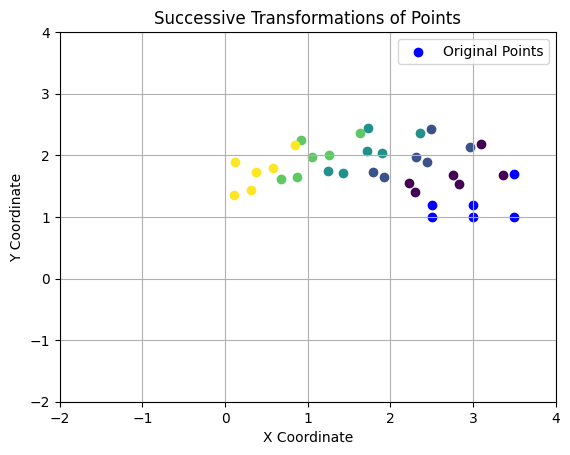

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Apply multiple successive transformations and store each result
num_iterations = 5  # Number of successive transformations to visualize
colors = plt.cm.viridis(np.linspace(0, 1, num_iterations))  # Generate a color gradient

# Convert input points to numpy array for initial plotting
input_points_np = input_points.numpy()
input_x, input_y = input_points_np[:, 0], input_points_np[:, 1]

# Plot the original input points
plt.scatter(input_x, input_y, color='blue', label='Original Points')

# Apply the transformation iteratively and plot each set
current_points = input_points.clone()  # Start with the original input points

for i in range(num_iterations):
    # Apply the trained model to get the next transformation
    transformed_points = model(current_points).detach().numpy()
    
    # Separate x and y coordinates for transformed points
    transformed_x, transformed_y = transformed_points[:, 0], transformed_points[:, 1]
    
    # Plot the transformed points with a new color each iteration
    plt.scatter(transformed_x, transformed_y, color=colors[i])
    
    # Set the current points to the latest transformed points for the next iteration
    current_points = torch.tensor(transformed_points, dtype=torch.float32)

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Successive Transformations of Points')
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model with specified layer dimensions
class TransformationModel(nn.Module):
    def __init__(self):
        super(TransformationModel, self).__init__()
        
        # Initial translation vector (to center rotation)
        self.initial_shift = nn.Parameter(torch.tensor([0.0, 0.0], dtype=torch.float32))
        
        # Rotation and transformation layers with specified dimensions
        self.rotation_matrix1 = nn.Linear(2, 8, bias=False)  # (2, 8) transformation
        self.final_shift1 = nn.Parameter(torch.zeros(8, dtype=torch.float32))  # (8,) shift vector

        self.rotation_matrix2 = nn.Linear(8, 8, bias=False)  # (8, 8) transformation
        self.final_shift2 = nn.Parameter(torch.zeros(8, dtype=torch.float32))  # (8,) shift vector

        self.rotation_matrix3 = nn.Linear(8, 2, bias=False)  # (8, 2) transformation
        self.final_shift3 = nn.Parameter(torch.zeros(2, dtype=torch.float32))  # (2,) shift vector

    def forward(self, x):
        # Apply initial shift to move rotation center
        x_shifted = x + self.initial_shift
        
        # First transformation layer
        x_rotated1 = self.rotation_matrix1(x_shifted)
        x_transformed1 = x_rotated1 + self.final_shift1  # (8,)

        # Second transformation layer
        x_rotated2 = self.rotation_matrix2(x_transformed1)
        x_transformed2 = x_rotated2 + self.final_shift2  # (8,)

        # Third transformation layer
        x_rotated3 = self.rotation_matrix3(x_transformed2)
        x_transformed_final = x_rotated3 + self.final_shift3  # (2,)

        return x_transformed_final

# Define the input and output points
input_points = torch.tensor([[2.5, 1.0],
                             [3.0, 1.0],
                             [3.5, 1.0],
                             [2.5, 1.2],
                             [3.0, 1.2],
                             [3.5, 1.7]], dtype=torch.float32)

output_points = torch.tensor([[2.433, 1.25],
                              [2.866, 1.50],
                              [3.299, 1.75],
                              [2.333, 1.4232],
                              [2.766, 1.6732],
                              [2.949, 2.3562]], dtype=torch.float32)

# Instantiate the model, loss function, and optimizer
model = TransformationModel()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(input_points)
    
    # Compute loss
    loss = loss_fn(y_pred, output_points)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print the learned parameters
print("Learned initial shift:", model.initial_shift.data)
print("Learned rotation matrix1:", model.rotation_matrix1.weight.data)
print("Learned final shift1:", model.final_shift1.data)
print("Learned rotation matrix2:", model.rotation_matrix2.weight.data)
print("Learned final shift2:", model.final_shift2.data)
print("Learned rotation matrix3:", model.rotation_matrix3.weight.data)
print("Learned final shift3:", model.final_shift3.data)


Epoch 0, Loss: 4.287440299987793
Epoch 1000, Loss: 0.014800984412431717
Epoch 2000, Loss: 0.0038729782681912184
Epoch 3000, Loss: 0.0007638033130206168
Epoch 4000, Loss: 0.00019464785873424262
Epoch 5000, Loss: 5.770454299636185e-05
Epoch 6000, Loss: 1.7930658941622823e-05
Epoch 7000, Loss: 5.726751169277122e-06
Epoch 8000, Loss: 1.8740138330031186e-06
Epoch 9000, Loss: 6.27030033228948e-07
Learned initial shift: tensor([ 0.0146, -0.1817])
Learned rotation matrix1: tensor([[ 0.1074,  0.4921],
        [-0.0165, -0.7291],
        [ 0.4764,  0.0546],
        [-0.9530, -0.1643],
        [ 0.2740,  0.1022],
        [ 0.5267, -0.3763],
        [ 0.6558, -0.1080],
        [-0.5104, -0.6996]])
Learned final shift1: tensor([-0.0271,  0.1236,  0.0292, -0.1071,  0.0048,  0.0617, -0.0489,  0.1682])
Learned rotation matrix2: tensor([[ 0.1151, -0.0238, -0.2010, -0.1653, -0.2058,  0.1274,  0.0136, -0.3500],
        [-0.2517,  0.2073,  0.0997, -0.1522,  0.0929, -0.0250, -0.0404,  0.3137],
        [ 0.

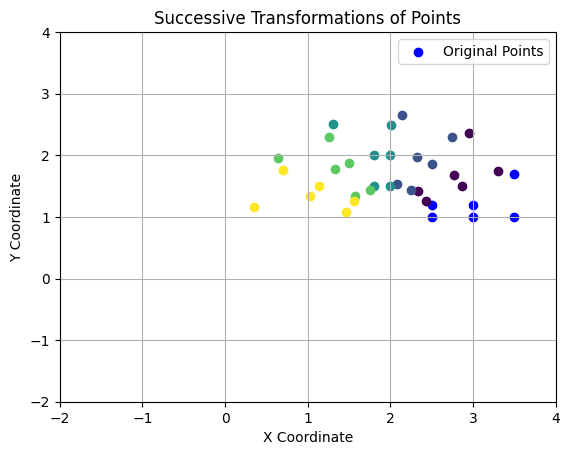

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Apply multiple successive transformations and store each result
num_iterations = 5  # Number of successive transformations to visualize
colors = plt.cm.viridis(np.linspace(0, 1, num_iterations))  # Generate a color gradient

# Convert input points to numpy array for initial plotting
input_points_np = input_points.numpy()
input_x, input_y = input_points_np[:, 0], input_points_np[:, 1]

# Plot the original input points
plt.scatter(input_x, input_y, color='blue', label='Original Points')

# Apply the transformation iteratively and plot each set
current_points = input_points.clone()  # Start with the original input points

for i in range(num_iterations):
    # Apply the trained model to get the next transformation
    transformed_points = model(current_points).detach().numpy()
    
    # Separate x and y coordinates for transformed points
    transformed_x, transformed_y = transformed_points[:, 0], transformed_points[:, 1]
    
    # Plot the transformed points with a new color each iteration
    plt.scatter(transformed_x, transformed_y, color=colors[i])
    
    # Set the current points to the latest transformed points for the next iteration
    current_points = torch.tensor(transformed_points, dtype=torch.float32)

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Successive Transformations of Points')
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
